## Creating a graph of a Home Assistant sensor
This notebook contains a simple example that creates a graph with data stored by Home Assistant in the local database. For a introduction to [matplotlib](http://matplotlib.org/) check the [matplotlib - 2D and 3D plotting in Python](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb) notebook.

### Setup

In [1]:
# matplotlib for plotting the data
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Instead of SQLAlchemy is the built-in Python support for SQLite used.
import sqlite3
import datetime

from matplotlib import dates

In [3]:
conn = sqlite3.connect('/path/to/.homeassistant/home-assistant_v2.db')

### Query

In [4]:
data = conn.execute("SELECT state, last_changed FROM states WHERE entity_id = 'sensor.random' AND state != 'unknown'")

### Prepare data for graph

In [5]:
values = []
timestamps = []

In [6]:
for x in data:
    timestamps.append(dates.date2num(datetime.datetime.strptime(x[1], '%Y-%m-%d %H:%M:%S.%f')))
    values.append(float(x[0]))

### Plot the graph

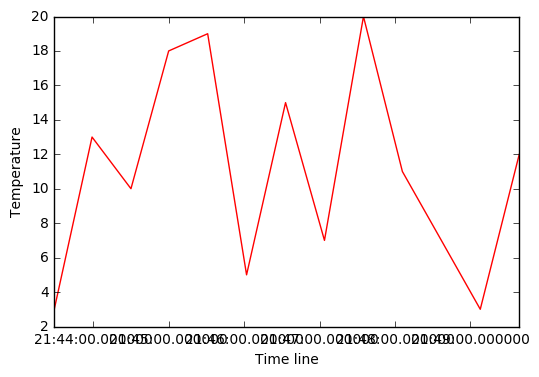

In [7]:
plt.plot_date(x=timestamps, y=values, fmt="r-")
plt.ylabel('Temperature')
plt.xlabel('Time line')